# Recommendation systems

Recommendation systems, also known as recommender systems, are a type of software application or algorithm that provide personalized suggestions or recommendations to users. These systems leverage data, user preferences, and various algorithms to predict and offer items or content that a user is likely to find interesting or relevant.

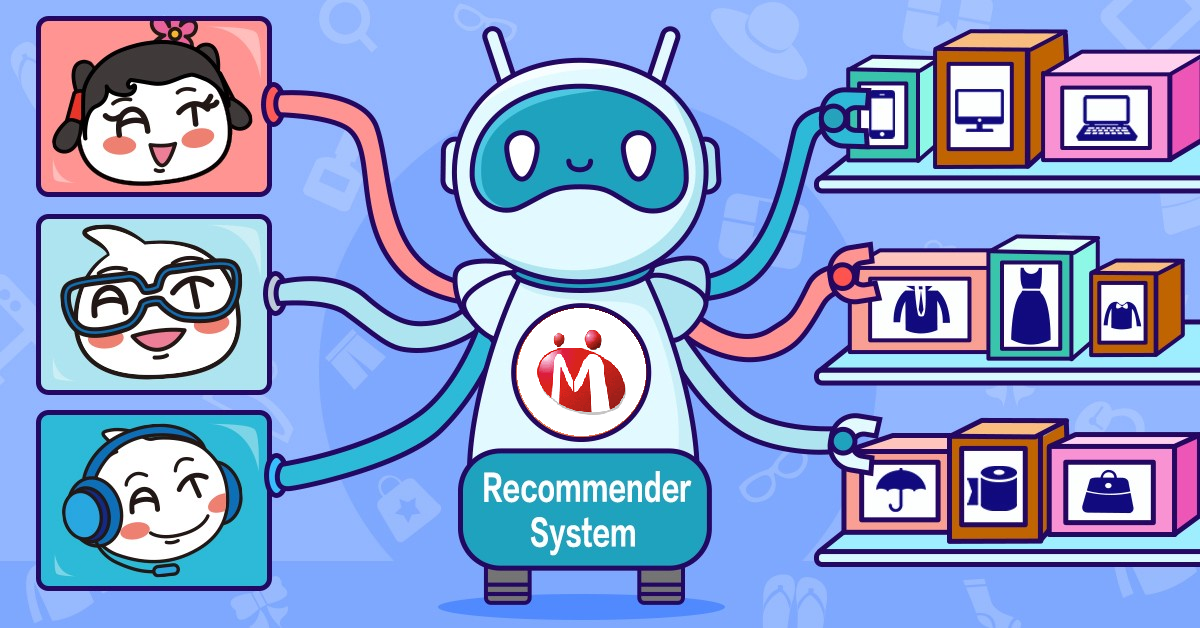

#  Types of recommendation systems:

* Rank Based (Most Popular)

* Knowledge Based

* Collaborative Filtering

*  Content Based

This notebook will cover the first two types of recommendation systems, the Rank-Based (Most Popular) and Knowledge-Based approaches, and will utilize the MovieLens dataset.

## Rank-based recommendation

A Rank-Based Recommendation System, also known as a "Most Popular" recommendation system, is one of the simplest and most straightforward types of recommendation systems. Instead of making personalized recommendations for individual users, it suggests the most popular or frequently interacted-with items to all users. This approach is particularly useful when you have limited user data, are dealing with new users who don't have a history of interactions, or you want to promote popular items to a wide audience.

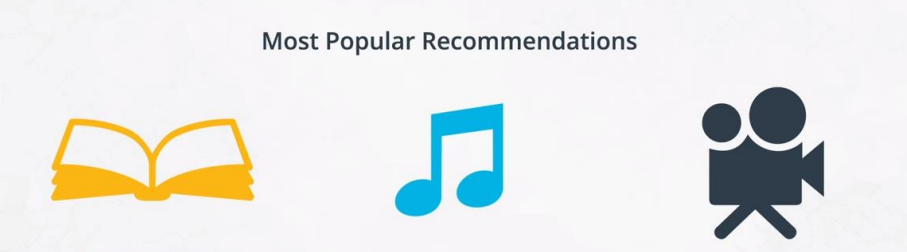

### Import necessary libraries & Load the dataset

In [ ]:
# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
# Enable inline plotting for Jupyter notebooks
%matplotlib inline


In [ ]:
# Read in the datasets
movies = pd.read_csv('/content/drive/MyDrive/movies_clean.csv')
reviews = pd.read_csv('/content/drive/MyDrive/reviews_clean.csv')
del movies['Unnamed: 0']
del reviews['Unnamed: 0']

In [ ]:
#Display first 5 rows in movies dataset
movies.head()

,movie_id,movie,genre,date,1800's,1900's,2000's,History,News,Horror,...,Fantasy,Romance,Game-Show,Action,Documentary,Animation,Comedy,Short,Western,Thriller
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short,1894,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,10,La sortie des usines Lumière (1895),Documentary|Short,1895,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,12,The Arrival of a Train (1896),Documentary|Short,1896,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,25,The Oxford and Cambridge University Boat Race ...,NaN,1895,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,91,Le manoir du diable (1896),Short|Horror,1896,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Display first 5 rows in reviews dataset
reviews.head()

,user_id,movie_id,rating,timestamp,date,month_1,month_2,month_3,month_4,month_5,...,month_9,month_10,month_11,month_12,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,1,68646,10,1381620027,2013-10-12 23:20:27,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,113277,10,1379466669,2013-09-18 01:11:09,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,422720,8,1412178746,2014-10-01 15:52:26,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,2,454876,8,1394818630,2014-03-14 17:37:10,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,790636,7,1389963947,2014-01-17 13:05:47,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### 1. How To Find The Most Popular Movies


For this notebook, we have a single objective. Regardless of the user's identity, our goal is to generate a list of recommendations based solely on the concept of "most popular" items.

To define what qualifies as "most popular," we've established the following criteria:

* Movies with the highest average ratings are considered the best.

* In the event of ties in average ratings, movies with a greater number of ratings are favored.

* To be eligible for consideration among the best movies, a movie must have received a minimum of 5 ratings.

* If movies have identical average ratings and the same number of ratings, the ranking is determined by the movie with the most recent rating.


With these criteria in mind, the objective of this notebook is to take a user's user_id as input and provide a list of the top n_top recommendations.

In [ ]:
def popular_recommendations(user_id, n_top):
    '''
    INPUT:
    user_id - the user_id of the individual you are making recommendations for
    n_top - an integer of the number recommendations you want back
    OUTPUT:
    top_movies - a list of the n_top recommended movies by movie title in order best to worst
    '''
    # Calculate average rating and count of ratings for each movie
    movie_ratings = reviews.groupby('movie_id').agg({'rating':['mean','count'],'date':['max']})
    # Reset the index for clarity
    movie_ratings.reset_index(inplace=True)
    # Rename columns for clarity
    movie_ratings.columns = ['movie_id', 'average_rating', 'num_ratings', 'latest_timestamp']
    # select movies with average rating above 5
    min_ratings = 5
    movie_ratings=movie_ratings[movie_ratings['average_rating']>=min_ratings]
    # sort the best movies based on ranking criteria
    best_movies = movie_ratings.sort_values(by=['average_rating','num_ratings','latest_timestamp'],ascending=False)
    # select top n_movies from the best_movies
    top_rated_movies = best_movies.head(n_top)
    #merge movies with top_rated_movies_dataset to get the movie name
    top_rated_movies_with_titles = top_rated_movies.merge(movies, on='movie_id')
    top_movies= list(top_rated_movies_with_titles['movie'].values)

    return top_movies # a list of the n_top movies as recommended

In [ ]:
# Test the popular_recommendations function
user_id = 1  # Replace with the user_id for whom you want recommendations
n_top = 10  # Replace with the number of top recommendations you want

recommended_movies = popular_recommendations(user_id, n_top)

# Print the recommended movies
print("Top Recommended Movies:")
for i, movie in enumerate(recommended_movies, 1):
    print(f"{i}. {movie}")


Top Recommended Movies:
1. MSG 2 the Messenger (2015)
2. Avengers: Age of Ultron Parody (2015)
3. Sorry to Bother You (2018)
4. Selam (2013)
5. Quiet Riot: Well Now You're Here, There's No Way Back (2014)
6. Crawl Bitch Crawl (2012)
7. Make Like a Dog (2015)
8. Pandorica (2016)
9. Third Contact (2011)
10. Romeo Juliet (2009)


## knowledge based recommendation system

A knowledge-based recommender system is a type of recommender system that makes recommendations based not on a user’s rating history, but on specific queries made by the user. It might prompt the user to give a series of rules or guidelines on what the results should look like, or an example of an item. The system then searches through its database of items and returns similar results.

a knowledge-based recommender system uses explicit input or queries from the user to provide recommendations.

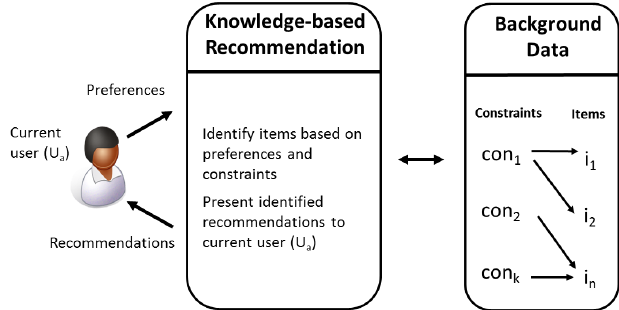

Having created a function to provide the top 'n' movies, let's enhance its robustness. We'll introduce additional arguments that will function as filters for movie release years and genres. Modify the existing function to accept these filters as lists of strings. As a result, the recommendations will be refined to include only movies that match the provided years and genres, acting as 'OR' conditions for filtering. In cases where no lists are provided, no filters will be applied."

This statement communicates the idea of enhancing the existing function with year and genre filters and explains how the filters will work when applied.






In [ ]:
def popular_recs_filtered(user_id, n_top, years=None, genres=None):
    '''
    INPUT:
    user_id - the user_id of the individual you are making recommendations for
    n_top - an integer of the number recommendations you want back
    years - a list of strings representing the years to filter movies
    genres - a list of strings representing the genres to filter movies
    OUTPUT:
    top_movies - a list of the n_top recommended movies by movie title in order from best to worst
    '''
    #Rename date column in movies dataset to prevent any conflict with the date column in reviews dataset
    movies.rename(columns={'date': 'year'}, inplace=True)
    # Merge movies with reviews to get the movie name, year and genre
    movies_data = movies.merge(reviews, on='movie_id')
    # Apply year filter if provided
    if years:
        # Filter movies by year
        movies_data = movies_data[movies_data['year'].isin(years)]
    # Apply genre filter if provided
    if genres:
        # Filter movies by genre
        movies_data = movies_data[movies_data['genre'].str.contains('|'.join(genres), case=False, na=False)]
        # Calculate average rating and count of ratings for each movie
    movie_ratings = movies_data.groupby('movie_id').agg({'rating':['mean','count'],'date':['max']})
    # Reset the index for clarity
    movie_ratings.reset_index(inplace=True)
    # Rename columns for clarity
    movie_ratings.columns = ['movie_id', 'average_rating', 'num_ratings', 'latest_timestamp']
    # select movies with average rating above 5
    min_ratings = 5
    movie_ratings=movie_ratings[movie_ratings['average_rating']>=min_ratings]
    # sort the best movies based on ranking criteria
    best_movies = movie_ratings.sort_values(by=['average_rating','num_ratings','latest_timestamp'],ascending=False)
    # select top n_movies from the best_movies
    top_rated_movies = best_movies.head(n_top)
    #merge movies with top_rated_movies_dataset to get the movie name
    top_rated_movies_with_titles = top_rated_movies.merge(movies, on='movie_id')
    top_movies= list(top_rated_movies_with_titles['movie'].values)
    return top_movies


In [ ]:
top_movies = popular_recs_filtered('4', 20, years=[2015, 2016, 2017, 2018], genres=['Horror'])
top_movies

["Evil's Evil Cousin (2016)",
 'Fiancé Killer (2018)',
 'Lake Placid: Legacy (2018)',
 'A Blood Story (2015)',
 'Night of Something Strange (2016)',
 'Paramedics (2016)',
 'A Dragon Arrives! (2016)',
 'Swamp Ape (2017)',
 'Theta States (2017)',
 'Todd Sloane (2016)',
 'Groundhog (2017)',
 'Zombie Playground: Ice Scream (2016)',
 'Dark Passenger: Volume 1 (2015)',
 'Psychos (2015)',
 'Slasher Weekend (2015)',
 'Dead Shack (2017)',
 "Director's Cut (2016)",
 'Bedeviled (2016)',
 'Hipersomnia (2016)',
 'Zygote (2017)']

In [ ]:
popular_recs_filtered('1', 10, years=[2015, 2016, 2017, 2018], genres=['Romance'])

['After Louie (2017)',
 'Ismaii (2017)',
 'Sevimli Tehlikeli (2015)',
 'Doukyuusei (2016)',
 'Jane Wants a Boyfriend (2015)',
 'Girl Night Stand (2015)',
 'ToY (2015)',
 "A Dogwalker's Christmas Tale (2015)",
 'Actor for Hire (2015)',
 'Sonsuz Ask (2017)']